<h1><center> Graph-based Relative Unconstrained Least-squares Importance Fitting </center></h1>

The goal of this jupyter notebook is to illustrate how to use the GRULSIF algorithm described in the paper <strong> "Collaborative likelihood-ratio estimation over graphs"</strong>.

In [3]:
##### Importing relevant libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm,uniform
import pandas as pd
import scipy

In [4]:
from Experiments import *
from Evaluation import *
from Models.likelihood_ratio_collaborative import *

# Experiment I.

**Experiment: Synth.Ia**

- **Feature space**: $\mathbb{R}^1$
- **Graph**: Stochastic Block Model (SBM) with 4 clusters, 25 nodes each.

| Location | $p_v$ | vs. | $q_v$ |
|----------|----------------|----------|----------------|
| $v \in C_1$ | $\mathcal{N}(\mu=0, \sigma=1)$ | vs.| $\text{Uniform}(-\sqrt{3}, \sqrt{3})$ |
| $v \in C_2 \cup C_3$ | $\mathcal{N}(\mu=0, \sigma=1)$| vs. | $\bullet$ |
| $v \in C_4$ | $\mathcal{N}(\mu=0, \sigma=1)$ | vs. | $\mathcal{N}(\mu=1, \sigma=\bullet)$ |


In [3]:
N_ref=50##### Number of observations for p_v at each node
N_test=50######## Number of observations for q_v at each node
n_nodes=100 ##### Number of nodes in the graph
sample_size=int(n_nodes/4) #### The number of nodes in each cluster

In [4]:
##### This experiment coincides with the first experiment appearing on the paper.
## The dataset under analysis is made of three components 
# G: A Graph structure compatible with the format of pygsp so we can plot the results 
# data_ref: A list of datasets of size the number of nodes. Each entry v at the list represent observations comming from the node level distribution p_v. 
# data_test: A list of datasets of size the number of nodes. Each entry v at the list represent observations comming from the node level distribution q_v.
G,data_ref,data_test,affected_nodes=generate_experiment_1_LRE(n_nodes,N_ref,N_test)    

### Graph structure

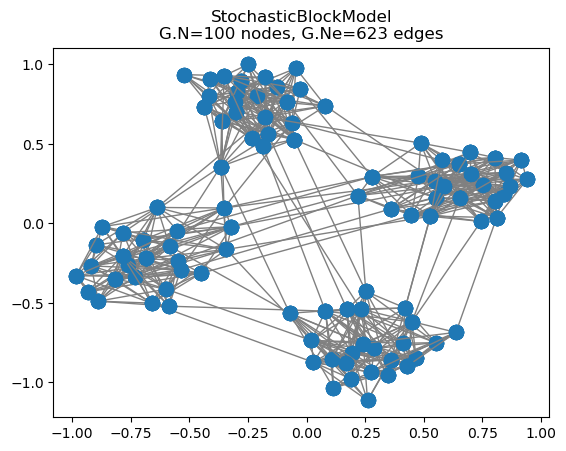

In [5]:
G.set_coordinates()
G.plot()

### Data distribution in nodes where p_v is different from q_v.

Text(0.5, 1.0, 'q_v for nodes in cluster C_2')

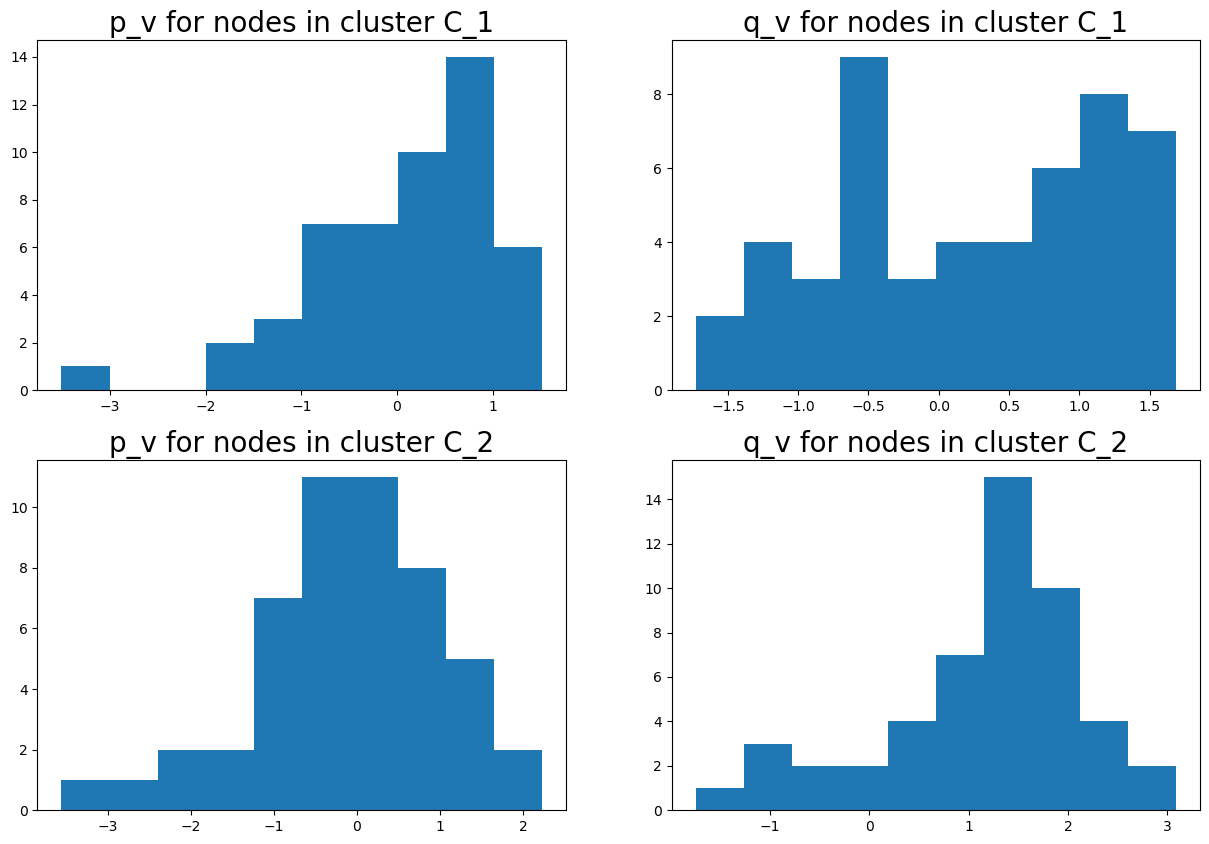

In [6]:
fig,ax=plt.subplots(2,2,figsize=(15, 10))
i=0
ax[0,0].hist(data_ref[i*sample_size])
ax[0,0].set_title('p_v for nodes in cluster C_1', fontsize=20)
ax[0,1].hist(data_test[i*sample_size])
ax[0,1].set_title("q_v for nodes in cluster C_1", fontsize=20)
i=3
ax[1,0].hist(data_ref[i*sample_size+1])
ax[1,0].set_title('p_v for nodes in cluster C_2', fontsize=20)
ax[1,1].hist(data_test[i*sample_size+1])
ax[1,1].set_title("q_v for nodes in cluster C_2", fontsize=20)

### Likelihood-Ratio Estimation and Pearson Divergence Estimation (GRULSIF vs POOL)

In [7]:
##### Grulsif
# Grulsif takes as main elements: 
# W: A sparse and symmetric weight matrix with positive entries. 
# data_ref: A list of datasets of size equal to the number of nodes. 
#           Each entry v in the list represents observations coming from the node-level distribution p_v. 
# data_test: A list of datasets of size equal to the number of nodes. 
#            Each entry v in the list represents observations coming from the node-level distribution q_v.
alpha = 0.1  # Regularization parameter; alpha should be between 0 and 1.
threshold_coherence = 0.3  # Threshold coherence used in the construction of the dictionary. 
                           # When the kernel is normal, this parameter should be between 0 and 1.
                           # The closer it is to 1, the larger the dictionary and the slower the training.
grulsif=GRULSIF(G.W,data_ref,data_test,alpha=alpha,verbose=True,threshold_coherence=threshold_coherence)
theta_grulsif=grulsif.fit(data_ref,data_test,tol=1e-3)

dictionary size::4
sigma::0.6,lambda:1.4142135623730952e-07,gamma:1.4142135623730952e-07,score:-0.5565
sigma::0.6,lambda:1.4142135623730952e-07,gamma:1.414213562373095e-05,score:-0.5613
sigma::0.6,lambda:1.4142135623730952e-07,gamma:0.001414213562373095,score:-0.5140
sigma::0.6,lambda:1.4142135623730952e-07,gamma:0.1414213562373095,score:-0.0324
sigma::0.6,lambda:7.952707287670507e-06,gamma:1.4142135623730952e-07,score:-0.5578
sigma::0.6,lambda:7.952707287670507e-06,gamma:1.414213562373095e-05,score:-0.5582
sigma::0.6,lambda:7.952707287670507e-06,gamma:0.001414213562373095,score:-0.5152
sigma::0.6,lambda:7.952707287670507e-06,gamma:0.1414213562373095,score:-0.0324
sigma::0.6,lambda:0.0004472135954999579,gamma:1.4142135623730952e-07,score:-0.5950
sigma::0.6,lambda:0.0004472135954999579,gamma:1.414213562373095e-05,score:-0.5946
sigma::0.6,lambda:0.0004472135954999579,gamma:0.001414213562373095,score:-0.5158
sigma::0.6,lambda:0.0004472135954999579,gamma:0.1414213562373095,score:-0.0324
si

In [8]:
##### Pool (Variant without the graph)
# Pool takes as main elements: 
# data_ref: A list of datasets of size equal to the number of nodes. 
#           Each entry v in the list represents observations coming from the node-level distribution p_v. 
# data_test: A list of datasets of size equal to the number of nodes. 
#            Each entry v in the list represents observations coming from the node-level distribution q_v.
alpha = 0.1  # Regularization parameter; alpha should be between 0 and 1.
threshold_coherence = 0.3  # Threshold coherence used in the construction of the dictionary. 
                           # When the kernel is normal, this parameter should be between 0 and 1.
                           # The closer it is to 1, the larger the dictionary and the slower the training.
pool=Pool(data_ref,data_test,alpha=alpha,verbose=True,tol=1e-3,threshold_coherence=threshold_coherence)
theta_pool=pool.fit(data_ref,data_test,tol=1e-3)

dictionary size::4
sigma::0.6,gamma:1.4142135623730952e-06,score:-0.5091
sigma::0.6,gamma:0.0001414213562373095,score:-0.5716
sigma::0.6,gamma:0.01414213562373095,score:-0.2261
sigma::0.6,gamma:1.414213562373095,score:-0.0034
dictionary size::5
sigma::0.8,gamma:1.4142135623730952e-06,score:-0.4790
sigma::0.8,gamma:0.0001414213562373095,score:-0.5571
sigma::0.8,gamma:0.01414213562373095,score:-0.2004
sigma::0.8,gamma:1.414213562373095,score:-0.0028
dictionary size::5
sigma::1.0,gamma:1.4142135623730952e-06,score:-0.4696
sigma::1.0,gamma:0.0001414213562373095,score:-0.5526
sigma::1.0,gamma:0.01414213562373095,score:-0.1785
sigma::1.0,gamma:1.414213562373095,score:-0.0024
dictionary size::7
sigma::1.2,gamma:1.4142135623730952e-06,score:-0.4228
sigma::1.2,gamma:0.0001414213562373095,score:-0.5368
sigma::1.2,gamma:0.01414213562373095,score:-0.1987
sigma::1.2,gamma:1.414213562373095,score:-0.0029
dictionary size::7
sigma::1.4,gamma:1.4142135623730952e-06,score:-0.4125
sigma::1.4,gamma:0.0001

#### Likelihood-Ratios 

In [9]:
#### Real likelihood-ratios
def real_relative_likelihood_ratio_C_1(x,alpha=0.1):
    return uniform.pdf(x,loc=-np.sqrt(3),scale=2*np.sqrt(3))/(alpha*uniform.pdf(x,loc=-np.sqrt(3),scale=2*np.sqrt(3))+(1-alpha)*norm.pdf(x))
def real_relative_likelihood_ratio_C_4(x,alpha=0.1):
    return norm.pdf(x,loc=1)/(alpha*norm.pdf(x,loc=1)+(1-alpha)*norm.pdf(x))
def real_relative_likelihood_ratio_C_2_C_3(x,alpha=0.1):
    return norm.pdf(x)/(alpha*norm.pdf(x)+(1-alpha)*norm.pdf(x))

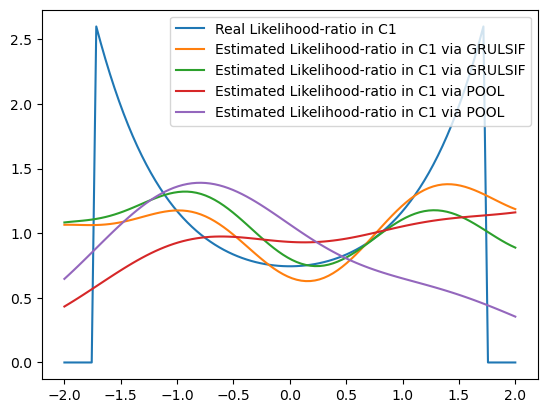

In [10]:
x=np.linspace(-2,2,100)
i=0
plt.plot(x,real_relative_likelihood_ratio_C_1(x,alpha=alpha),label="Real Likelihood-ratio in C1")
plt.plot(x,grulsif.r_v(int(i*sample_size),theta_grulsif,x),label="Estimated Likelihood-ratio in C1 via GRULSIF")
plt.plot(x,grulsif.r_v(int(i*sample_size+1),theta_grulsif,x),label="Estimated Likelihood-ratio in C1 via GRULSIF")
plt.plot(x,pool.r_v(int(i*sample_size),theta_pool,x),label="Estimated Likelihood-ratio in C1 via POOL")
plt.plot(x,pool.r_v(int(i*sample_size+1),theta_pool,x),label="Estimated Likelihood-ratio in C1 via POOL")
plt.legend()

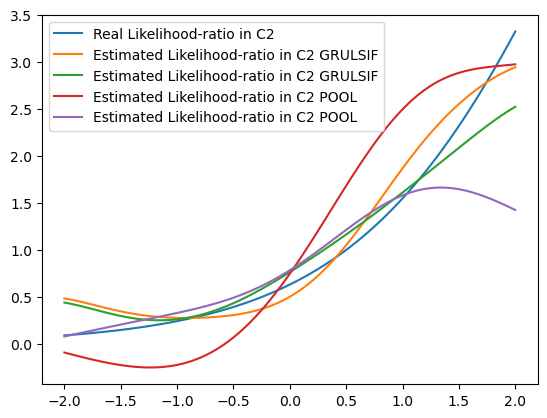

In [11]:
x=np.linspace(-2,2,100)
i=3
plt.plot(x,real_relative_likelihood_ratio_C_4(x,alpha=alpha),label="Real Likelihood-ratio in C2")
plt.plot(x,grulsif.r_v(int(i*sample_size+5),theta_grulsif,x),label="Estimated Likelihood-ratio in C2 GRULSIF")
plt.plot(x,grulsif.r_v(int(i*sample_size+6),theta_grulsif,x),label="Estimated Likelihood-ratio in C2 GRULSIF")
plt.plot(x,pool.r_v(int(i*sample_size+5),theta_pool,x),label="Estimated Likelihood-ratio in C2 POOL")
plt.plot(x,pool.r_v(int(i*sample_size+6),theta_pool,x),label="Estimated Likelihood-ratio in C2 POOL")
plt.legend()

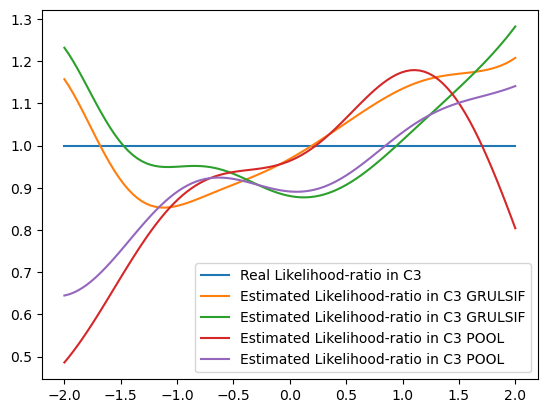

In [12]:
x=np.linspace(-2,2,100)
i=1
plt.plot(x,real_relative_likelihood_ratio_C_2_C_3(x,alpha=alpha),label="Real Likelihood-ratio in C3")
plt.plot(x,grulsif.r_v(int(i*sample_size+5),theta_grulsif,x),label="Estimated Likelihood-ratio in C3 GRULSIF")
plt.plot(x,grulsif.r_v(int(i*sample_size+6),theta_grulsif,x),label="Estimated Likelihood-ratio in C3 GRULSIF")
plt.plot(x,pool.r_v(int(i*sample_size+5),theta_pool,x),label="Estimated Likelihood-ratio in C3 POOL")
plt.plot(x,pool.r_v(int(i*sample_size+6),theta_pool,x),label="Estimated Likelihood-ratio in C3 POOL")
plt.legend()

#### Pearson Divergence Estimation 

In [13]:
_,data_ref_validation,data_test_validation,_=generate_experiment_1_LRE(100,10000,10000)    
PE_divergence_grulsif=grulsif.PE_divergence(theta_grulsif,data_ref_validation,data_test_validation)
PE_divergence_pool=pool.PE_divergence(theta_pool,data_ref_validation,data_test_validation)

Text(0.5, 1.0, 'POOL $\\alpha=0.1$')

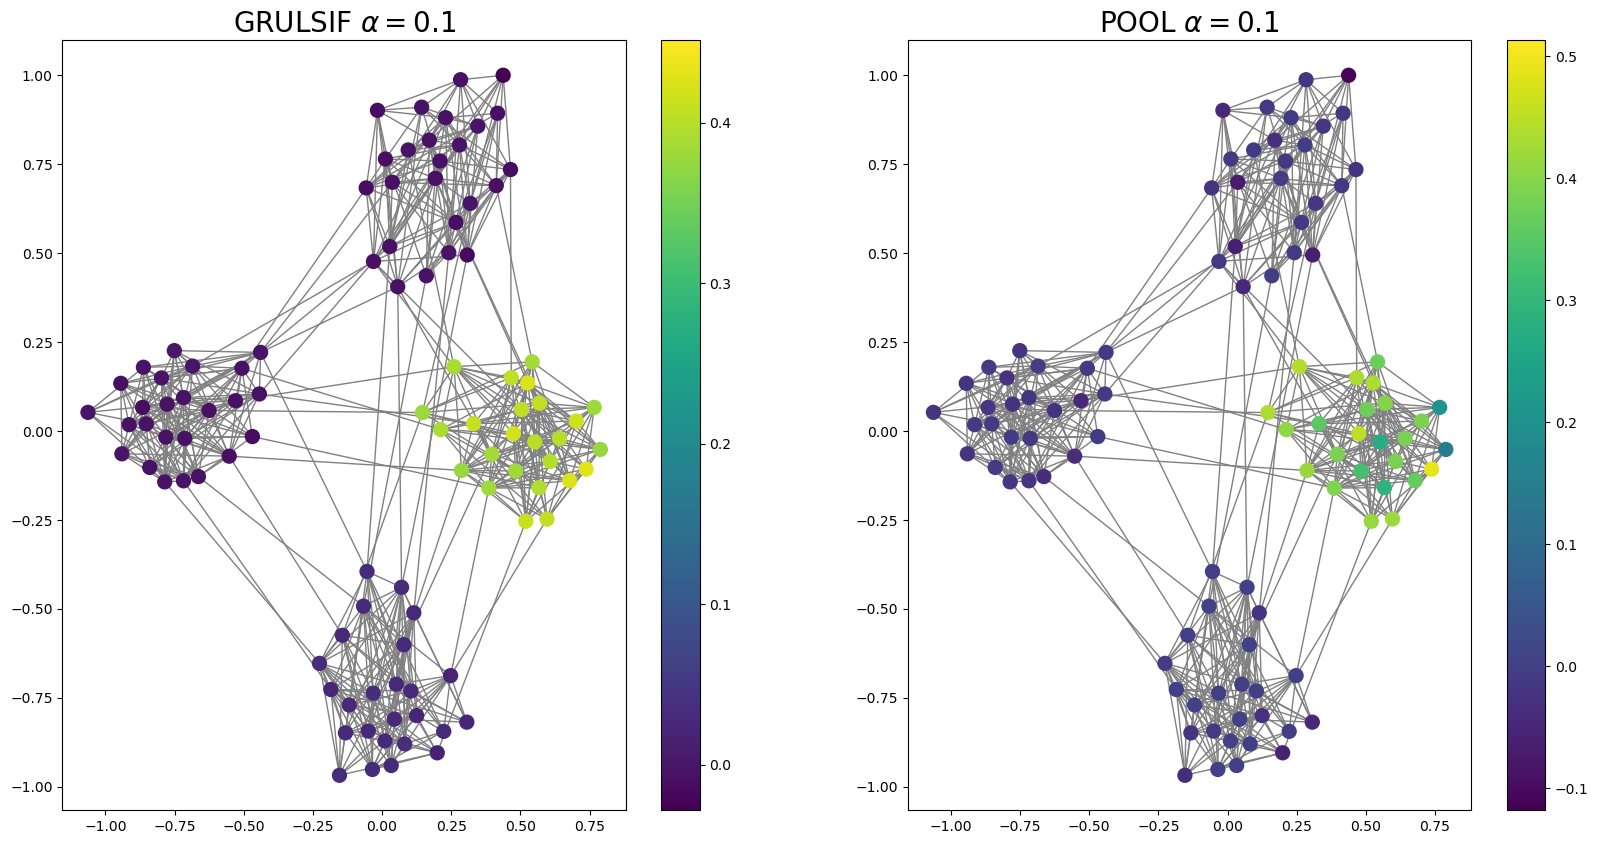

In [14]:
G.set_coordinates()
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
G.plot_signal(PE_divergence_grulsif,ax=ax[0])
ax[0].set_title(rf'GRULSIF $\alpha={alpha}$', fontsize=20)
G.plot_signal(PE_divergence_pool,ax=ax[1])
ax[1].set_title(rf'POOL $\alpha={alpha}$', fontsize=20)

### Estimation errors of the Pearson Divergence

In [15]:
experiment="1A"
real_PE_div=estimate_real_f_div(experiment,n_nodes,alpha,type="PE")
real_PE_div=[real_PE_div[int(sample_size*i):int(sample_size*(i+1))] for i in range(4)]
real_PE_div=np.median(np.vstack(real_PE_div),axis=1)

In [16]:
PEARSON_cost_boxplot_grulsif=[PE_divergence_grulsif[int(sample_size*i):int(sample_size*(i+1))] for i in range(4)]
PEARSON_cost_boxplot_pool=[PE_divergence_pool[int(sample_size*i):int(sample_size*(i+1))] for i in range(4)] 

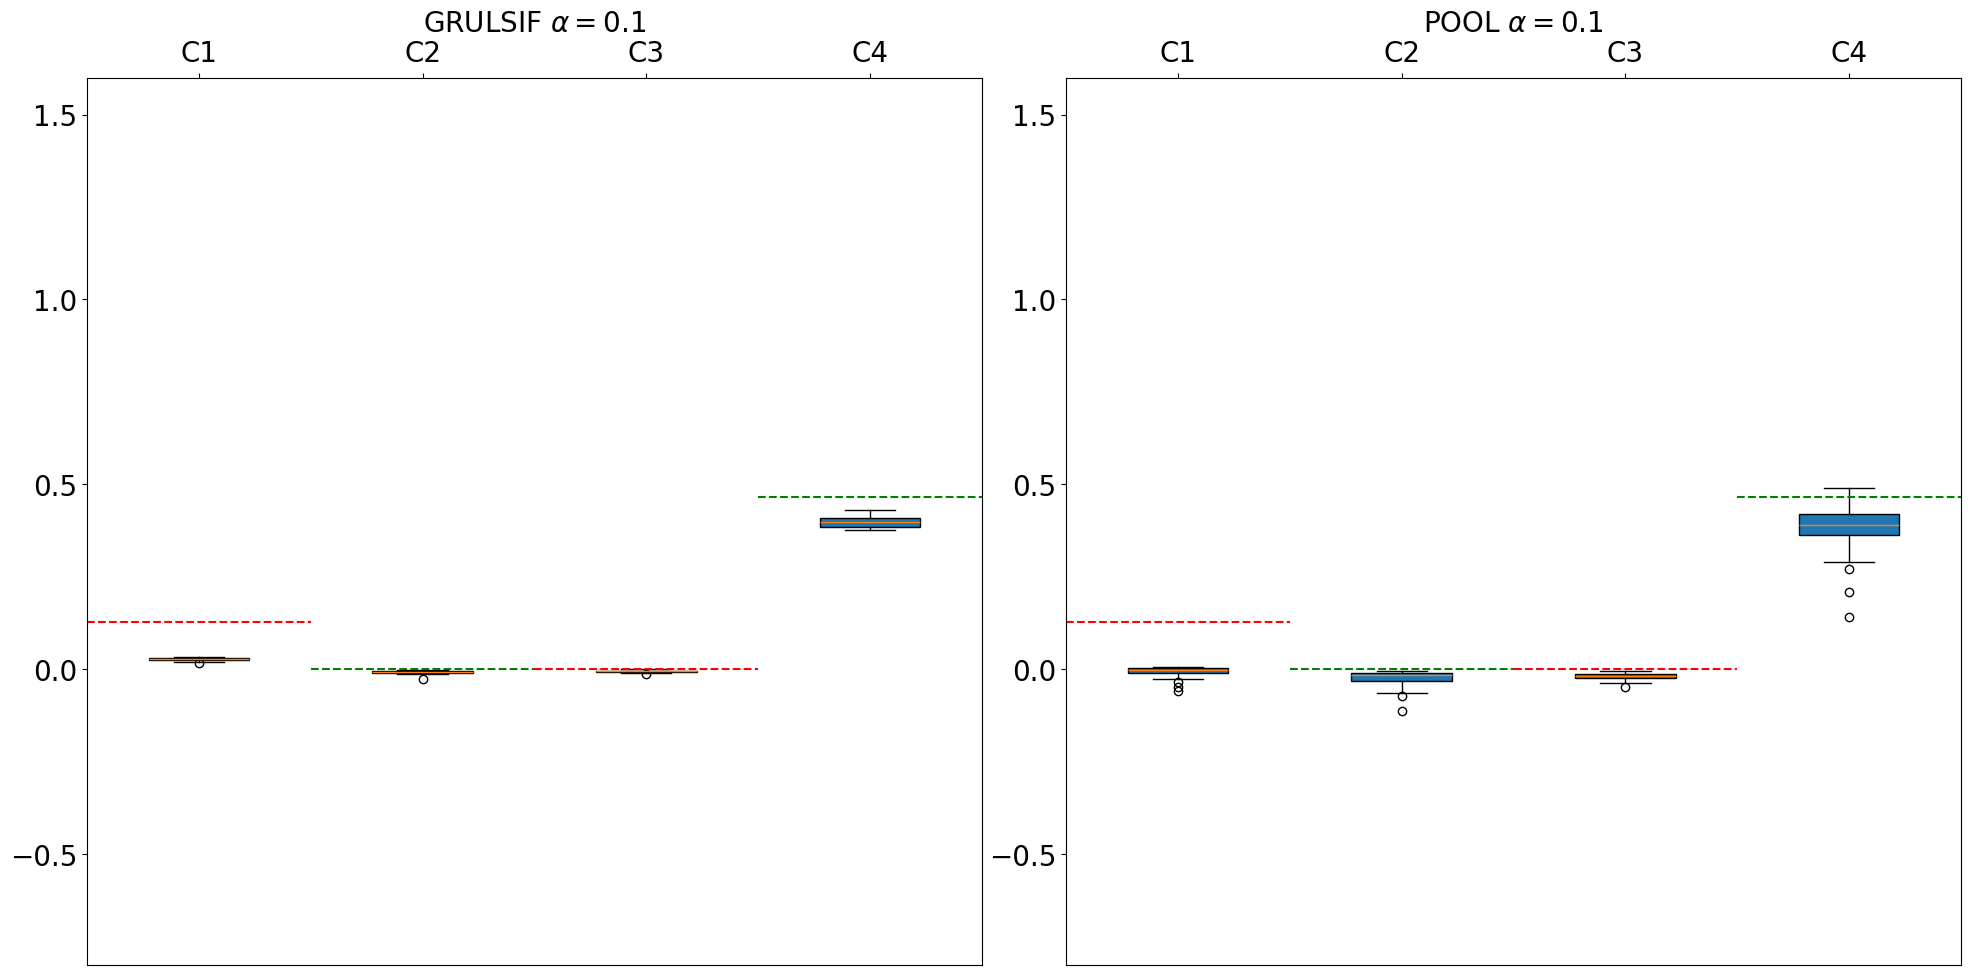

In [17]:
labels=["C1","C2","C3","C4"]
fig,axs = plt.subplots(nrows=1, ncols=2,figsize=(20,10))
fig.tight_layout(pad=3.0)
bplot1 = axs[0].boxplot(PEARSON_cost_boxplot_grulsif,
               vert=True, 
               patch_artist=True,  
               labels=labels) 
axs[0].set_title(rf'GRULSIF $\alpha={alpha}$', fontsize=20)
axs[0].set_ylim([-0.8,1.6])
C1=axs[0].axhline(y=real_PE_div[0],xmin=0.00,xmax=0.25, color='red',linestyle="dashed", label="C1")
C2=axs[0].axhline(y=real_PE_div[1],xmin=0.25,xmax=0.5, color='green',linestyle="dashed",label="C2")
C3=axs[0].axhline(y=real_PE_div[2],xmin=0.5,xmax=0.75, color='red',linestyle="dashed",label="C3")
C4=axs[0].axhline(y=real_PE_div[3],xmin=0.75,xmax=1.00, color='green',linestyle="dashed",label="C4")
axs[0].tick_params(axis='x', labelsize=20)
axs[0].xaxis.tick_top()
axs[0].tick_params(axis='y', labelsize=20)

bplot2 = axs[1].boxplot(PEARSON_cost_boxplot_pool,
               vert=True,  # vertical box alignment
               patch_artist=True,  # fill with color
               labels=labels)  # will be used to label x-ticks
axs[1].set_title(rf'POOL $\alpha={alpha}$', fontsize=20)
axs[1].set_ylim([-0.8,1.6])
C1=axs[1].axhline(y=real_PE_div[0],xmin=0.00,xmax=0.25, color='red',linestyle="dashed", label="C1")
C2=axs[1].axhline(y=real_PE_div[1],xmin=0.25,xmax=0.5, color='green',linestyle="dashed",label="C2")
C3=axs[1].axhline(y=real_PE_div[2],xmin=0.5,xmax=0.75, color='red',linestyle="dashed",label="C3")
C4=axs[1].axhline(y=real_PE_div[3],xmin=0.75,xmax=1.00, color='green',linestyle="dashed",label="C4")
axs[1].tick_params(axis='x', labelsize=20)
axs[1].xaxis.tick_top()
axs[1].tick_params(axis='y', labelsize=20)

## Convergence in L_2

In [ ]:
alpha=0.1
n_nodes=100
threshold_coherence=0.3
sample_size=np.array((50,100,250,500))
list_errors_grulsif=[]
list_errors_pool=[]
for s in sample_size:
    G,data_ref,data_test,affected_nodes=generate_experiment_1_LRE(n_nodes,s,s) 
    grulsif_=GRULSIF(G.W,data_ref,data_test,threshold_coherence=threshold_coherence,alpha=alpha,verbose=False)
    grulsif_theta=grulsif_.fit(data_ref,data_test)
    error_grulsif=evaluate_models(experiment="1A",n_nodes=n_nodes,alpha=alpha,theta=grulsif_theta,model_likelihood_ratios=grulsif_)
    list_errors_grulsif.append(np.mean(error_grulsif))
    pool_=Pool(data_ref,data_test,threshold_coherence=threshold_coherence,alpha=alpha,verbose=False)
    pool_theta=pool_.fit(data_ref,data_test)
    error_pool=evaluate_models(experiment="1A",n_nodes=n_nodes,alpha=alpha,theta=pool_theta,model_likelihood_ratios=pool_)
    list_errors_pool.append(np.mean(error_pool))

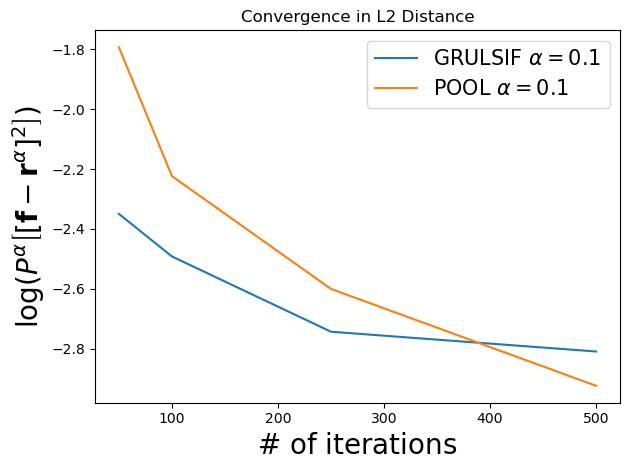

In [19]:
plt.title("Convergence in L2 Distance")
plt.plot(sample_size,np.log(np.hstack(list_errors_grulsif)),label=rf'GRULSIF $\alpha={alpha}$')
plt.plot(sample_size,np.log(np.hstack(list_errors_pool)),label=rf'POOL $\alpha={alpha}$')
plt.ylabel(r'$\log(P^{\alpha}\left[ [\mathbf{f}-\mathbf{r}^{\alpha}]^2 \right])$',fontsize=20)
plt.xlabel(r'$\#$ of iterations',fontsize=20)
plt.legend(fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Experiment II.a. 

**Experiment: Synth.IIa**

- **Feature space**: $\mathbb{R}^2$
- **Graph**: Grid with 1000 nodes.

| Location | $p_v$ | vs. | $q_v$ |
|----------|----------------|----------|----------------|
| $v \in V$ | $\mathcal{N}(\mu=(0,0)^{\top}, \Sigma=I)$ |  vs. |  $\mathcal{N}(\mu=(r,c)^{\top}, \Sigma), \Sigma_{0,0} = 1 + |r|, \quad \Sigma_{1,1} = 1 + |c|, \quad \Sigma_{1,2} = \Sigma_{2,1} = 0$ |

where: 

$r = 2 \frac{(\#\text{row} - 5)}{\max_{\#\text{row}} (\#\text{row} - 5)}$ and $c = 2 \frac{(\#\text{col} - 5)}{\max_{\#\text{col}} (\#\text{col} - 5)}$

In [5]:
N_ref=100##### Number of observations for p_v at each node
N_test=100######## Number of observations for q_v at each node
n_nodes=250 ##### Number of nodes in the graph

In [6]:
##### This experiment coincides with the third experiment appearing in the paper.
## The dataset under analysis is made of three components 
# G: A Graph structure compatible with the format of pygsp so we can plot the results 
# data_ref: A list of datasets of size the number of nodes. Each entry v at the list represent observations comming from the node level distribution p_v. 
# data_test: A list of datasets of size the number of nodes. Each entry v at the list represent observations comming from the node level distribution q_v.
G,data_ref,data_test,affected_nodes=generate_experiment_3_LRE(n_nodes,N_ref,N_test)  
G,data_ref_validation,data_test_validation,affected_nodes=generate_experiment_3_LRE(n_nodes,N_ref=1000,N_test=1000)  

## Graph structure

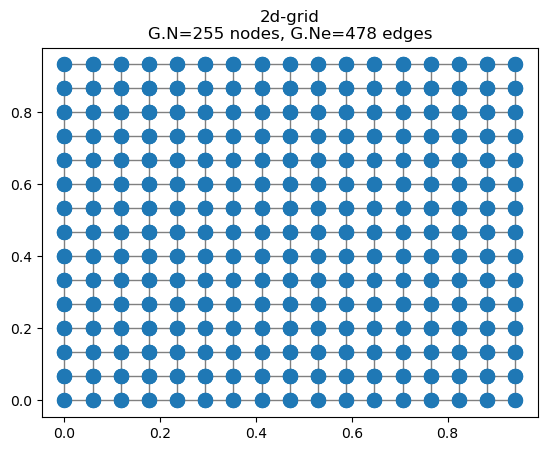

In [7]:
G.plot()

### Data distribution in nodes where p_v is different from q_v.

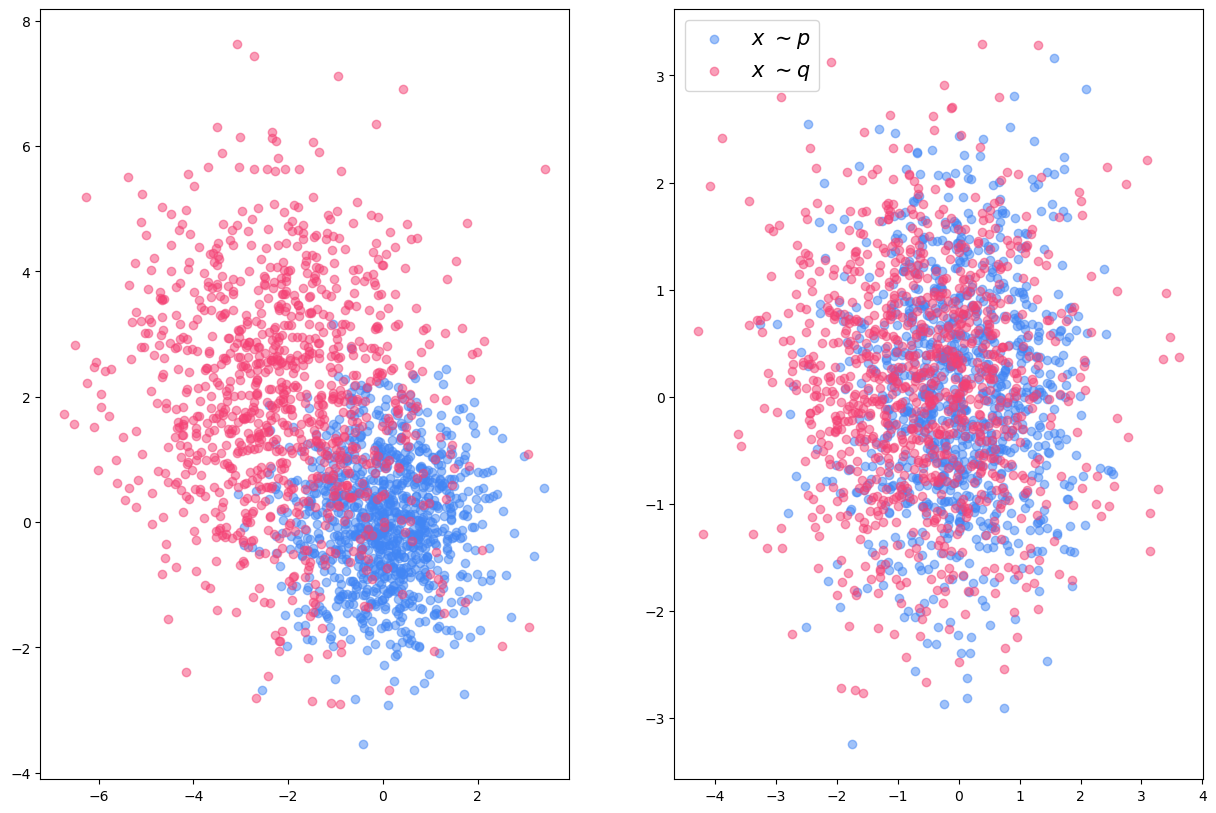

In [8]:
fig,ax=plt.subplots(1,2,figsize=(15, 10))
i=0
ax[0].scatter(data_ref_validation[i][:,0],data_ref_validation[i][:,1],alpha=0.5,color="#4286f4",label=r'$x \ \sim p$')
ax[0].scatter(data_test_validation[i][:,0],data_test_validation[i][:,1],alpha=0.5,color="#f44174",label=r'$x \ \sim q$')
i=int(n_nodes/2)
ax[1].scatter(data_ref_validation[i][:,0],data_ref_validation[i][:,1],alpha=0.5,color="#4286f4",label=r'$x \ \sim p$')
ax[1].scatter(data_test_validation[i][:,0],data_test_validation[i][:,1],alpha=0.5,color="#f44174",label=r'$x \ \sim q$')
plt.tick_params(axis="x", labelsize=10) 
plt.tick_params(axis="y", labelsize=10) 
plt.legend(fontsize=15)

### Likelihood-Ratio Estimation and Pearson Divergence Estimation (GRULSIF vs POOL)

In [9]:
##### Grulsif
# Grulsif takes as main elements: 
# W: A sparse and symmetric weight matrix with positive entries. 
# data_ref: A list of datasets of size equal to the number of nodes. 
#           Each entry v in the list represents observations coming from the node-level distribution p_v. 
# data_test: A list of datasets of size equal to the number of nodes. 
#            Each entry v in the list represents observations coming from the node-level distribution q_v.
alpha = 0.1  # Regularization parameter; alpha should be between 0 and 1.
threshold_coherence = 0.3  # Threshold coherence used in the construction of the dictionary. 
                           # When the kernel is normal, this parameter should be between 0 and 1.
                           # The closer it is to 1, the larger the dictionary and the slower the training.
alpha=0.1 
threshold_coherence=0.3
grulsif=GRULSIF(G.W,data_ref,data_test,alpha=alpha,verbose=True,threshold_coherence=threshold_coherence)
theta_grulsif=grulsif.fit(data_ref,data_test,tol=1e-3)

dictionary size::35
sigma::0.6,lambda:6.262242910851495e-08,gamma:6.262242910851495e-08,score:-1.5328
sigma::0.6,lambda:6.262242910851495e-08,gamma:6.262242910851494e-06,score:-1.5175
sigma::0.6,lambda:6.262242910851495e-08,gamma:0.0006262242910851495,score:-0.6051
sigma::0.6,lambda:6.262242910851495e-08,gamma:0.06262242910851494,score:-0.0173
sigma::0.6,lambda:3.5215179771520987e-06,gamma:6.262242910851495e-08,score:-1.5352
sigma::0.6,lambda:3.5215179771520987e-06,gamma:6.262242910851494e-06,score:-1.5349
sigma::0.6,lambda:3.5215179771520987e-06,gamma:0.0006262242910851495,score:-0.6073
sigma::0.6,lambda:3.5215179771520987e-06,gamma:0.06262242910851494,score:-0.0173
sigma::0.6,lambda:0.00019802950859533483,gamma:6.262242910851495e-08,score:-1.6005
sigma::0.6,lambda:0.00019802950859533483,gamma:6.262242910851494e-06,score:-1.5962
sigma::0.6,lambda:0.00019802950859533483,gamma:0.0006262242910851495,score:-0.6059
sigma::0.6,lambda:0.00019802950859533483,gamma:0.06262242910851494,score:-0

In [10]:
##### Pool (Variant without the graph)
# Pool takes as main elements: 
# data_ref: A list of datasets of size equal to the number of nodes. 
#           Each entry v in the list represents observations coming from the node-level distribution p_v. 
# data_test: A list of datasets of size equal to the number of nodes. 
#            Each entry v in the list represents observations coming from the node-level distribution q_v.
alpha = 0.1  # Regularization parameter; alpha should be between 0 and 1.
threshold_coherence = 0.3  # Threshold coherence used in the construction of the dictionary. 
                           # When the kernel is normal, this parameter should be between 0 and 1.
                           # The closer it is to 1, the larger the dictionary and the slower the training.
alpha=0.1 
threshold_coherence=0.3
pool=Pool(data_ref,data_test,alpha=alpha,verbose=True,tol=1e-3,threshold_coherence=threshold_coherence)
theta_pool=pool.fit(data_ref,data_test,tol=1e-3)

dictionary size::35
sigma::0.6,gamma:1.0000000000000002e-06,score:-1.6591
sigma::0.6,gamma:0.0001,score:-1.1815
sigma::0.6,gamma:0.01,score:-0.0955
sigma::0.6,gamma:1.0,score:-0.0011
dictionary size::41
sigma::0.8,gamma:1.0000000000000002e-06,score:-1.6490
sigma::0.8,gamma:0.0001,score:-1.1168
sigma::0.8,gamma:0.01,score:-0.0760
sigma::0.8,gamma:1.0,score:-0.0009
dictionary size::52
sigma::1.0,gamma:1.0000000000000002e-06,score:-1.6517
sigma::1.0,gamma:0.0001,score:-1.0634
sigma::1.0,gamma:0.01,score:-0.0658
sigma::1.0,gamma:1.0,score:-0.0007
dictionary size::63
sigma::1.2,gamma:1.0000000000000002e-06,score:-1.6077
sigma::1.2,gamma:0.0001,score:-1.0359
sigma::1.2,gamma:0.01,score:-0.0603
sigma::1.2,gamma:1.0,score:-0.0007
dictionary size::72
sigma::1.4,gamma:1.0000000000000002e-06,score:-1.5917
sigma::1.4,gamma:0.0001,score:-0.9944
sigma::1.4,gamma:0.01,score:-0.0549
sigma::1.4,gamma:1.0,score:-0.0006


#### Likelihood-Ratios 

In [11]:
#### Real likelihood-ratios
_,data_ref_validation,data_test_validation,affected_nodes=generate_experiment_3_LRE(n_nodes,N_ref,N_test)
N_1=int(np.sqrt(n_nodes))
N_2=int(np.ceil(n_nodes/N_1))

A=np.array([[np.cos(-np.pi/2),-np.sin(-np.pi/2)],[np.sin(-np.pi/2),np.cos(-np.pi/2)]])
n_nodes=int(N_1*N_2)
coordinates=np.zeros(shape=(n_nodes,2))
for i in range(n_nodes):
    n_row=int(i/N_2)
    n_col=i % N_2
    coordinates[i,:]=A.dot(np.array([n_row,n_col])-np.array([N_1/2,N_2/2]))
            
coordinates[:,0]/=np.max(np.abs(coordinates[:,0]))
coordinates[:,1]/=np.max(np.abs(coordinates[:,1]))
coordinates*=2.0
          
real_likelihoods=[]
for i in range(n_nodes):
    real_likelihoods.append(lambda x:real_relative_likelihood_ratio_grid(x,coordinates[i,:],alpha=alpha))

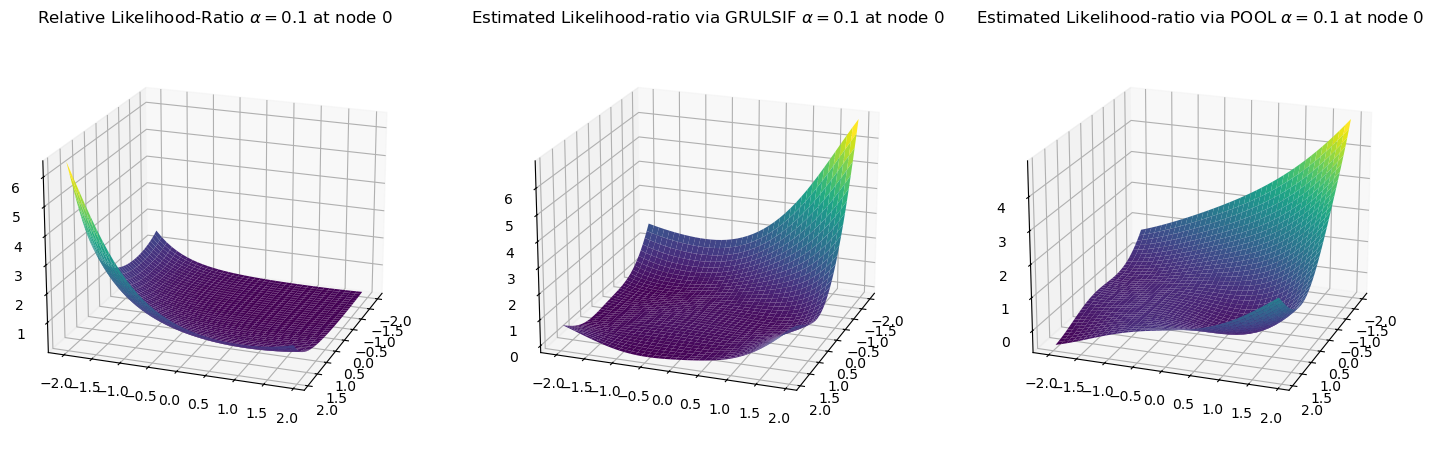

In [12]:
node=0
x=np.arange(-2.0,2.0,1/10)
y=np.arange(-2.0,2.0,1/10)
X, Y = np.meshgrid(x, y)  # Cartesian grid
cartesian_product = np.column_stack([X.ravel(), Y.ravel()])  # Reshape to (N,2) form
Z=real_likelihoods[node](cartesian_product)
Z_grulsif=grulsif.r_v(node,theta_grulsif,cartesian_product)
Z_pool=pool.r_v(node,theta_pool,cartesian_product)
Z = Z.reshape(X.shape)  
Z_grulsif = Z_grulsif.reshape(X.shape) 
Z_pool = Z_pool.reshape(X.shape)

fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')

ax1.plot_surface(X, Y,Z, cmap='viridis')
ax1.view_init(20, 20)
ax1.set_title(rf"Relative Likelihood-Ratio $\alpha={alpha}$ at node {node}")

ax2.plot_surface(X, Y,Z_grulsif, cmap='viridis')
ax2.view_init(20, 20)
ax2.set_title(rf"Estimated Likelihood-ratio via GRULSIF $\alpha={alpha}$ at node {node}")

ax3.plot_surface(X, Y,Z_pool, cmap='viridis')
ax3.view_init(20, 20)
ax3.set_title(rf"Estimated Likelihood-ratio via POOL $\alpha={alpha}$ at node {node}")

plt.show()

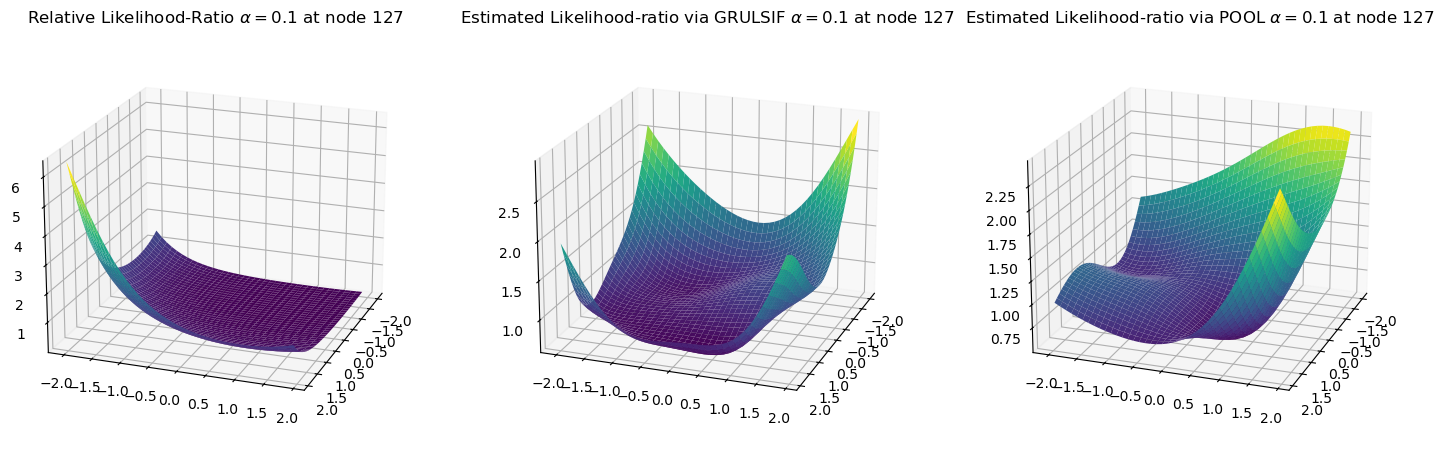

In [13]:
node=int(n_nodes/2)
x=np.arange(-2.0,2.0,1/10)
y=np.arange(-2.0,2.0,1/10)
X, Y = np.meshgrid(x, y)  # Cartesian grid
cartesian_product = np.column_stack([X.ravel(), Y.ravel()])  # Reshape to (N,2) form
Z=real_likelihoods[node](cartesian_product)
Z_grulsif=grulsif.r_v(node,theta_grulsif,cartesian_product)
Z_pool=pool.r_v(node,theta_pool,cartesian_product)
Z = Z.reshape(X.shape)  
Z_grulsif = Z_grulsif.reshape(X.shape) 
Z_pool = Z_pool.reshape(X.shape)

fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')

ax1.plot_surface(X, Y,Z, cmap='viridis')
ax1.view_init(20, 20)
ax1.set_title(rf"Relative Likelihood-Ratio $\alpha={alpha}$ at node {node}")

ax2.plot_surface(X, Y,Z_grulsif, cmap='viridis')
ax2.view_init(20, 20)
ax2.set_title(rf"Estimated Likelihood-ratio via GRULSIF $\alpha={alpha}$ at node {node}")

ax3.plot_surface(X, Y,Z_pool, cmap='viridis')
ax3.view_init(20, 20)
ax3.set_title(rf"Estimated Likelihood-ratio via POOL $\alpha={alpha}$ at node {node}")

plt.show()

#### Pearson Divergence Estimation 

In [14]:
_,data_ref_validation,data_test_validation,_=generate_experiment_3_LRE(n_nodes,10000,10000)    
PE_divergence_grulsif=grulsif.PE_divergence(theta_grulsif,data_ref_validation,data_test_validation)
PE_divergence_pool=pool.PE_divergence(theta_pool,data_ref_validation,data_test_validation)

Text(0.5, 1.0, 'POOL $\\alpha=0.1$')

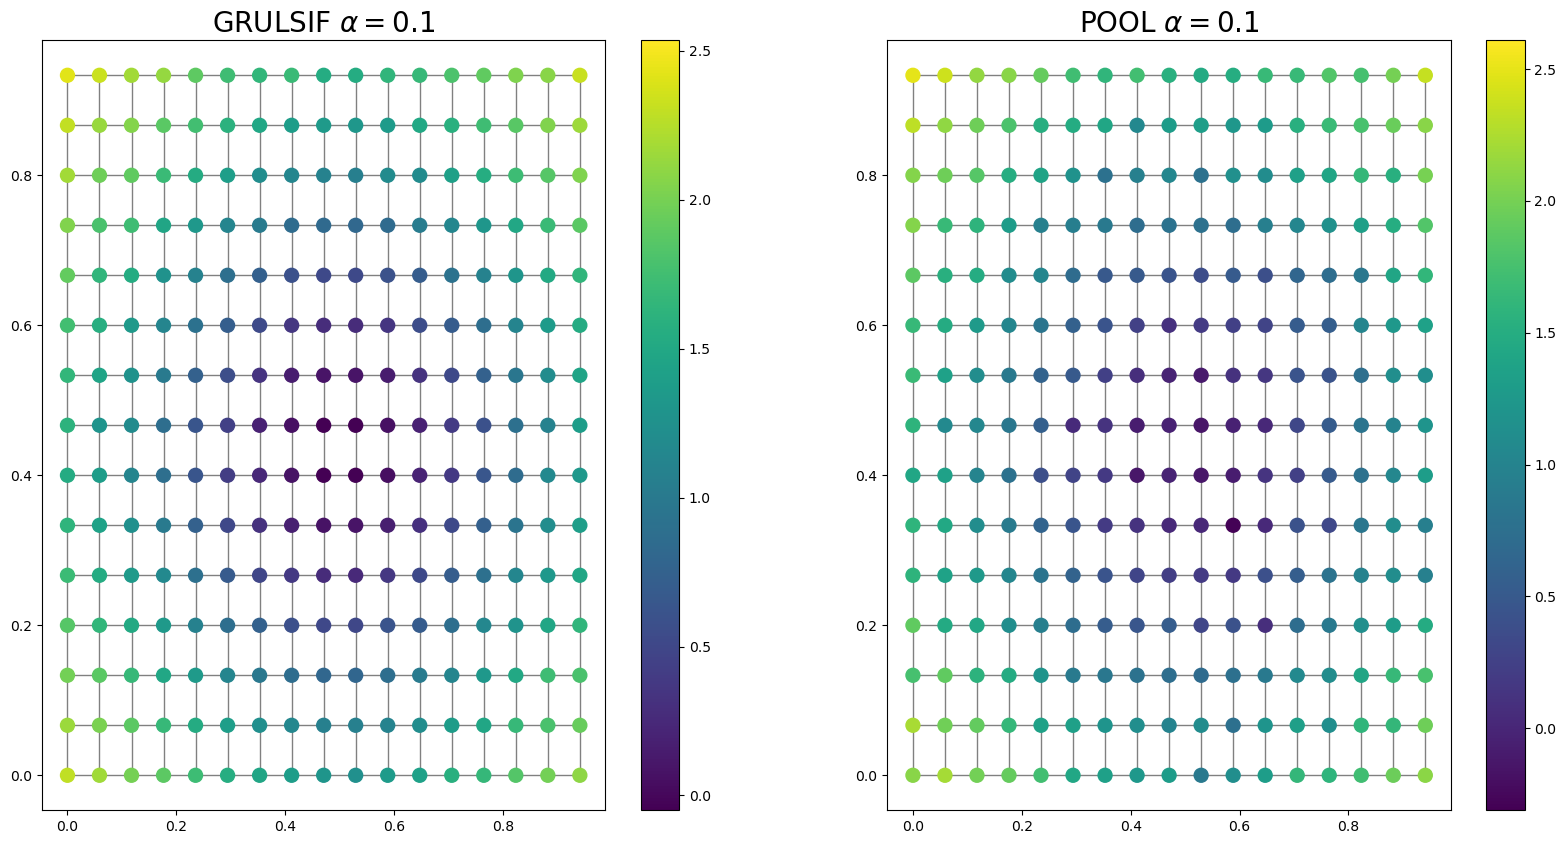

In [15]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
G.plot_signal(PE_divergence_grulsif,ax=ax[0])
ax[0].set_title(rf'GRULSIF $\alpha={alpha}$', fontsize=20)
G.plot_signal(PE_divergence_pool,ax=ax[1])
ax[1].set_title(rf'POOL $\alpha={alpha}$', fontsize=20)

### Estimation errors of the Pearson Divergence

In [16]:
experiment="2A"
real_PE_div=estimate_real_f_div(experiment,n_nodes,alpha,type="PE")

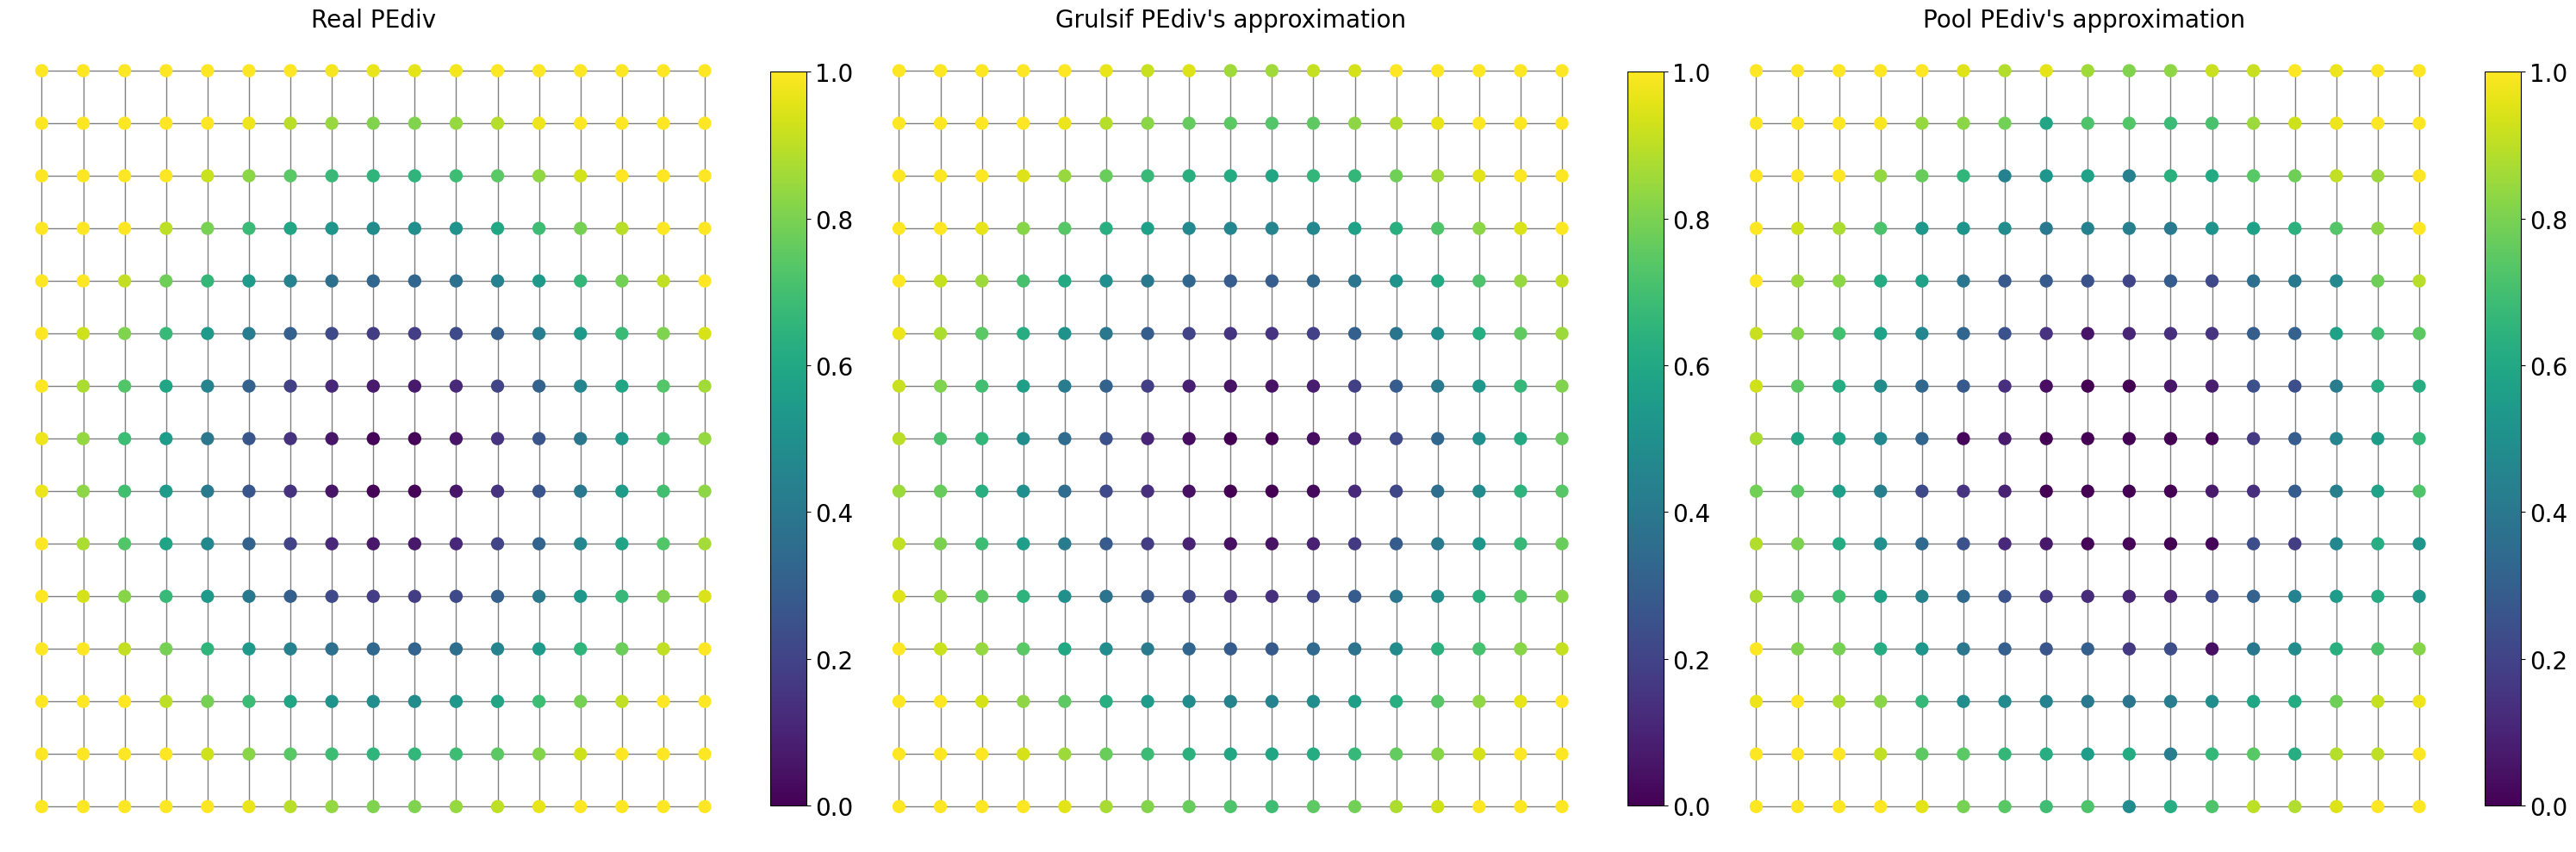

In [17]:
fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(30,10))
im1=G.plot_signal(real_PE_div,limits=[0.0,np.quantile(real_PE_div,0.75)],ax=axs[0],colorbar=False)
axs[0].set_title("Real PEdiv",fontsize=20)
axs[0].set_axis_off()
cbar1 = fig.colorbar(im1, ax=axs[0], orientation='vertical', fraction=0.046, pad=0.04)
cbar1.ax.tick_params(labelsize=20)
im2=G.plot_signal(PE_divergence_grulsif,limits=[0.0,np.quantile(real_PE_div,0.75)],ax=axs[1],colorbar=False)
axs[1].set_title("Grulsif PEdiv's approximation",fontsize=20)
axs[1].set_axis_off()
cbar2 = fig.colorbar(im2, ax=axs[1], orientation='vertical', fraction=0.046, pad=0.04)
cbar2.ax.tick_params(labelsize=20)
im3=G.plot_signal(PE_divergence_pool,limits=[0.0,np.quantile(real_PE_div,0.75)],ax=axs[2],colorbar=False)
axs[2].set_title("Pool PEdiv's approximation ",fontsize=20)
axs[2].set_axis_off()
cbar3 = fig.colorbar(im3, ax=axs[2], orientation='vertical', fraction=0.046, pad=0.04)
cbar3.ax.tick_params(labelsize=20)  
plt.tight_layout()

## Convergence in L_2

In [18]:
alpha=0.1
threshold_coherence=0.3
sample_size=np.array((50,100,250,500))
list_errors_grulsif=[]
list_errors_pool=[]
for s in sample_size:
    G,data_ref,data_test,affected_nodes=generate_experiment_3_LRE(n_nodes,s,s) 
    grulsif_=GRULSIF(G.W,data_ref,data_test,threshold_coherence=threshold_coherence,alpha=alpha,verbose=False)
    grulsif_theta=grulsif_.fit(data_ref,data_test)
    error_grulsif=evaluate_models(experiment="2A",n_nodes=n_nodes,alpha=alpha,theta=grulsif_theta,model_likelihood_ratios=grulsif_)
    list_errors_grulsif.append(np.mean(error_grulsif))
    pool_=Pool(data_ref,data_test,threshold_coherence=threshold_coherence,alpha=alpha,verbose=False)
    pool_theta=pool_.fit(data_ref,data_test)
    error_pool=evaluate_models(experiment="2A",n_nodes=n_nodes,alpha=alpha,theta=pool_theta,model_likelihood_ratios=pool_)
    list_errors_pool.append(np.mean(error_pool))

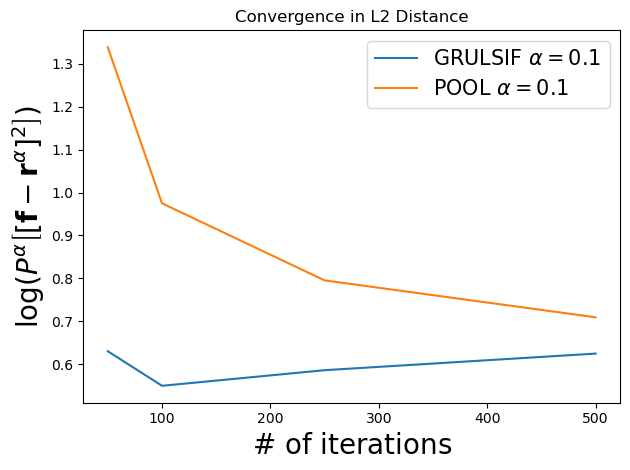

In [36]:
plt.title("Convergence in L2 Distance")
plt.plot(sample_size,np.log(np.hstack(list_errors_grulsif)),label=rf'GRULSIF $\alpha={alpha}$')
plt.plot(sample_size,np.log(np.hstack(list_errors_pool)),label=rf'POOL $\alpha={alpha}$')
plt.ylabel(r'$\log(P^{\alpha}\left[ [\mathbf{f}-\mathbf{r}^{\alpha}]^2 \right])$',fontsize=20)
plt.xlabel(r'$\#$ of iterations',fontsize=20)
plt.legend(fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()